<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment/blob/main/DataMining_MulticlassClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 96.5 MB/s eta 0:

In [10]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/seattle-weather.csv")

In [11]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1315, 6)
Unseen Data For Predictions: (146, 6)


In [12]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'weather', session_id=123, use_gpu=true)

,Description,Value
0,Session id,123
1,Target,weather
2,Target type,Multiclass
3,Target mapping,"drizzle: 0, fog: 1, rain: 2, snow: 3, sun: 4"
4,Original data shape,"(1315, 6)"
5,Transformed data shape,"(1315, 6)"
6,Transformed train set shape,"(920, 6)"
7,Transformed test set shape,"(395, 6)"
8,Numeric features,4
9,Categorical features,1


In [13]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8348,0.9282,0.8348,0.7536,0.7858,0.7081,0.7303,1.2470
knn,K Neighbors Classifier,0.7511,0.8696,0.7511,0.7082,0.7249,0.5730,0.5786,0.3250
svm,SVM - Linear Kernel,0.7293,0.0000,0.7293,0.6774,0.6761,0.5314,0.5605,0.1580
ridge,Ridge Classifier,0.7196,0.0000,0.7196,0.6340,0.6720,0.5015,0.5139,0.1470
ada,Ada Boost Classifier,0.4402,0.5000,0.4402,0.1938,0.2691,0.0000,0.0000,0.6870
dummy,Dummy Classifier,0.4402,0.5000,0.4402,0.1938,0.2691,0.0000,0.0000,0.3430
xgboost,Extreme Gradient Boosting,0.3674,0.6221,0.3674,0.1858,0.2448,-0.0091,-0.0121,0.5590
et,Extra Trees Classifier,0.1696,0.6529,0.1696,0.1233,0.1366,-0.1016,-0.1404,0.5820
rf,Random Forest Classifier,0.1152,0.5242,0.1152,0.0694,0.0821,-0.2334,-0.3115,0.8980
lightgbm,Light Gradient Boosting Machine,0.1152,0.1763,0.1152,0.0565,0.0725,-0.2367,-0.3219,0.9780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0109,0.5000,0.0109,0.0001,0.0002,0.0000,0.0000
1,0.0109,0.5000,0.0109,0.0001,0.0002,0.0000,0.0000
2,0.0109,0.5000,0.0109,0.0001,0.0002,0.0000,0.0000
3,0.0109,0.5000,0.0109,0.0001,0.0002,0.0000,0.0000
4,0.0217,0.5000,0.0217,0.0005,0.0009,0.0000,0.0000
5,0.0217,0.5000,0.0217,0.0005,0.0009,0.0000,0.0000
6,0.0217,0.5000,0.0217,0.0005,0.0009,0.0000,0.0000
7,0.0217,0.5000,0.0217,0.0005,0.0009,0.0000,0.0000
8,0.0217,0.5000,0.0217,0.0005,0.0009,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7717,0.8785,0.7717,0.7298,0.7490,0.6072,0.6106
1,0.7283,0.8911,0.7283,0.7018,0.7148,0.5414,0.5424
2,0.8370,0.9092,0.8370,0.7922,0.8124,0.7233,0.7278
3,0.7391,0.8705,0.7391,0.6738,0.7049,0.5440,0.5486
4,0.7065,0.8506,0.7065,0.6449,0.6729,0.4876,0.4933
5,0.7500,0.8832,0.7500,0.7112,0.7236,0.5797,0.5897
6,0.6957,0.8051,0.6957,0.6604,0.6727,0.4809,0.4872
7,0.7391,0.8285,0.7391,0.6862,0.7071,0.5512,0.5615
8,0.7717,0.8964,0.7717,0.7372,0.7485,0.6103,0.6141


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8152,0.9045,0.8152,0.7476,0.7721,0.6732,0.6960
1,0.8804,0.9303,0.8804,0.7971,0.8339,0.7901,0.8037
2,0.8370,0.9531,0.8370,0.7621,0.7915,0.7116,0.7327
3,0.8587,0.9458,0.8587,0.7690,0.8072,0.7479,0.7680
4,0.8261,0.9022,0.8261,0.7443,0.7762,0.6898,0.7133
5,0.8261,0.9372,0.8261,0.7340,0.7714,0.6923,0.7168
6,0.8370,0.9211,0.8370,0.7603,0.7920,0.7160,0.7348
7,0.8261,0.9415,0.8261,0.7340,0.7714,0.6923,0.7168
8,0.8370,0.9149,0.8370,0.7668,0.7911,0.7138,0.7383


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4457,0.6621,0.4457,0.3223,0.3706,0.2512,0.3430
1,0.4457,0.6786,0.4457,0.3481,0.3870,0.2694,0.3727
2,0.4457,0.6703,0.4457,0.3347,0.3786,0.2604,0.3576
3,0.4457,0.6703,0.4457,0.3347,0.3786,0.2604,0.3576
4,0.4565,0.6654,0.4565,0.3232,0.3722,0.2614,0.3547
5,0.4565,0.6735,0.4565,0.3355,0.3801,0.2703,0.3663
6,0.4565,0.6694,0.4565,0.3293,0.3761,0.2659,0.3593
7,0.4565,0.6694,0.4565,0.3293,0.3761,0.2659,0.3593
8,0.4565,0.6694,0.4565,0.3293,0.3761,0.2659,0.3593


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:

import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7717,0.8738,0.7717,0.6827,0.7239,0.5924,0.6032
1,0.8152,0.8869,0.8152,0.7200,0.7641,0.6700,0.6823
2,0.8152,0.9254,0.8152,0.7193,0.7640,0.6700,0.6816
3,0.7609,0.8812,0.7609,0.6826,0.7174,0.5763,0.5874
4,0.7391,0.8368,0.7391,0.6526,0.6915,0.5344,0.5457
5,0.7717,0.8605,0.7717,0.6900,0.7222,0.5989,0.6188
6,0.7174,0.8559,0.7174,0.6269,0.6678,0.5000,0.5117
7,0.7283,0.8735,0.7283,0.6793,0.6803,0.5192,0.5647
8,0.7174,0.8479,0.7174,0.6265,0.6682,0.5000,0.5109


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8261,0.9078,0.8261,0.7539,0.7821,0.6924,0.7129
1,0.8804,0.9329,0.8804,0.7971,0.8339,0.7901,0.8037
2,0.8587,0.9544,0.8587,0.7855,0.8140,0.7521,0.7714
3,0.8478,0.9451,0.8478,0.7564,0.7966,0.7284,0.7459
4,0.8152,0.9013,0.8152,0.7421,0.7708,0.6731,0.6926
5,0.8478,0.9434,0.8478,0.7475,0.7911,0.7308,0.7515
6,0.8370,0.9171,0.8370,0.7603,0.7920,0.7160,0.7348
7,0.8370,0.9366,0.8370,0.7406,0.7813,0.7115,0.7340
8,0.8478,0.9134,0.8478,0.7732,0.8010,0.7329,0.7552


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


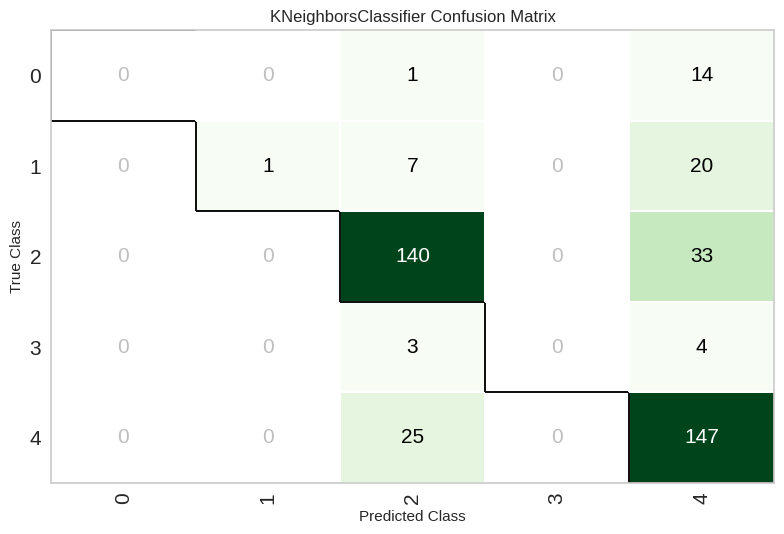

In [20]:
plot_model(tuned_knn, plot = 'confusion_matrix')

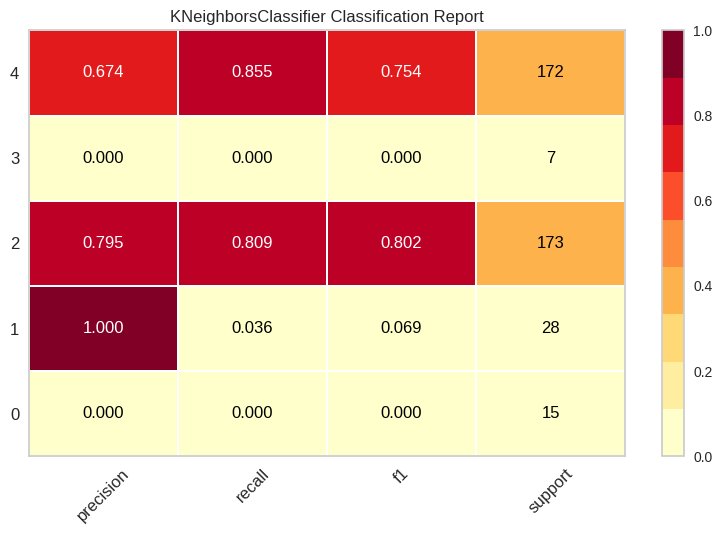

In [21]:
plot_model(tuned_knn, plot = 'class_report')

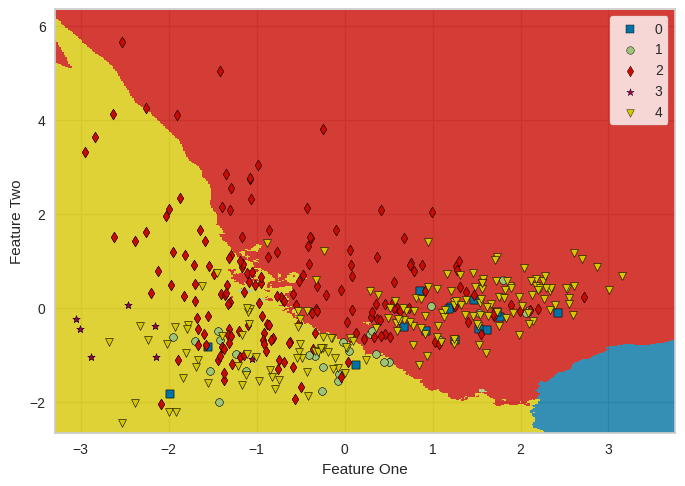

In [22]:
plot_model(tuned_knn, plot='boundary')

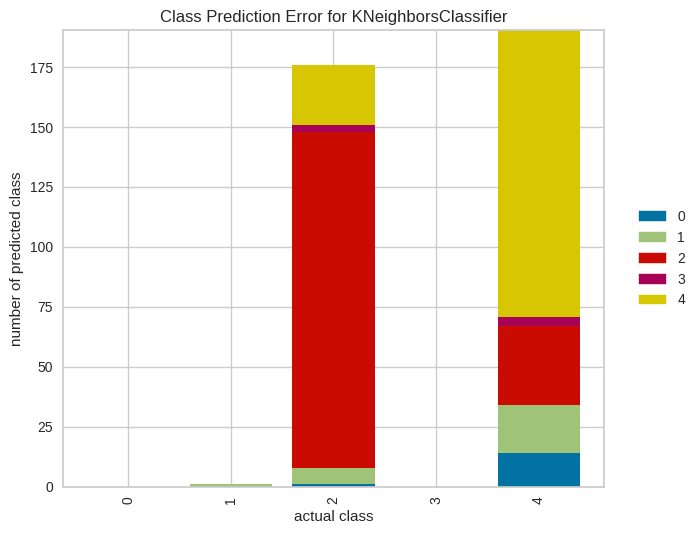

In [23]:
plot_model(tuned_knn, plot = 'error')

In [24]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7291,0.8628,0.7291,0.7129,0.6845,0.5200,0.5323


In [26]:
final_knn = finalize_model(tuned_knn)

In [28]:
save_model(final_knn,'Final KNN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['precipitation', 'temp_max',
                                              'temp_min', 'wind'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_...
                                     transformer=TargetEncoder(cols=['date'],
                                                               drop_invariant=False,
                                                

In [29]:
final_knn = load_model('Final KNN Model')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_pred = predict_model(final_knn, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7808,0.8797,0.7808,0.7116,0.7419,0.6025,0.6137


In [31]:
new_pred.head()

,date,precipitation,temp_max,temp_min,wind,weather,prediction_label,prediction_score
0,2012-01-06,2.500000,4.4,2.2,2.2,2,rain,0.7895
1,2012-01-08,0.000000,10.0,2.8,2.0,4,sun,0.5263
2,2012-01-14,4.100000,4.4,0.6,5.3,3,rain,0.6842
3,2012-01-18,19.799999,0.0,-2.8,5.0,3,rain,0.5789
4,2012-02-02,0.000000,8.3,1.7,2.6,4,sun,0.3158
